### Test case LVV-T65: Verify implementation of Source Catalog

Verify that all Sources produced by the DRP pipelines contain the entries listed in DMS-REQ-0267.

**DMS-REQ-0267** Specification: The DMS shall create a Catalog containing all Sources detected in single (standard) visits and will contain an identifier of the Exposure on which the Source was detected, as well as measurements of Source Attributes. The measured attributes (and associated errors) include location on the focal plane; a static point-source model fit to world coordinates and flux; a centroid and adaptive moments; and surface brightnesses through multiple circular apertures that are concentric, PSF-homogenized, and logarithmically spaced in intensity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lsst.daf.butler import Butler

In [2]:
butler = Butler('/repo/main', collections="LSSTCam/runs/DRP/20250501_20250609/w_2025_30/DM-51933")

#### Retrieve a source catalogs in each of the ugrizy bands:

Select a single `source2` catalog in each band. Specify only a band, and limit the query results to return only one dataset reference.

In [3]:
source_refs_dict = {}
bands_list = ['u', 'g', 'r', 'i', 'z', 'y']
for band in bands_list:
    source_refs_dict[band] = butler.query_datasets('source2', band=band,
                                                   skymap='lsst_cells_v1', limit=1)

In [4]:
source_refs_dict

{'u': [DatasetRef(DatasetType('source2', {band, instrument, day_obs, physical_filter, visit}, ArrowAstropy), {instrument: 'LSSTCam', visit: 2025050100464, band: 'u', day_obs: 20250501, physical_filter: 'u_24'}, run='LSSTCam/runs/DRP/20250501_20250609/w_2025_30/DM-51933/20250810T211051Z', id=708c33c7-e5a3-4986-b7bd-a592405cd655)],
 'g': [DatasetRef(DatasetType('source2', {band, instrument, day_obs, physical_filter, visit}, ArrowAstropy), {instrument: 'LSSTCam', visit: 2025050100371, band: 'g', day_obs: 20250501, physical_filter: 'g_6'}, run='LSSTCam/runs/DRP/20250501_20250609/w_2025_30/DM-51933/20250810T211051Z', id=dd89fda9-ad83-4087-aa13-b6121e639524)],
 'r': [DatasetRef(DatasetType('source2', {band, instrument, day_obs, physical_filter, visit}, ArrowAstropy), {instrument: 'LSSTCam', visit: 2025050100309, band: 'r', day_obs: 20250501, physical_filter: 'r_57'}, run='LSSTCam/runs/DRP/20250501_20250609/w_2025_30/DM-51933/20250810T211051Z', id=9c48f23f-2b65-479d-9caa-b6c092eaf576)],
 'i':

In [5]:
src_i = butler.get(source_refs_dict['i'][0])

#### Examine the columns in the Source catalog

Print the column names in the i-band source catalog retrieved in the previous cell. These include positions (both focal plane and World coordinates), fluxes, shapes (moments), and their errors, along with various quality flags and calibration quantities.

In [6]:
src_i.colnames

['coord_ra',
 'coord_dec',
 'parentSourceId',
 'x',
 'y',
 'xErr',
 'yErr',
 'ra',
 'dec',
 'raErr',
 'decErr',
 'ra_dec_Cov',
 'calibFlux',
 'calibFluxErr',
 'ap03Flux',
 'ap03FluxErr',
 'ap03Flux_flag',
 'ap06Flux',
 'ap06FluxErr',
 'ap06Flux_flag',
 'ap09Flux',
 'ap09FluxErr',
 'ap09Flux_flag',
 'ap12Flux',
 'ap12FluxErr',
 'ap12Flux_flag',
 'ap17Flux',
 'ap17FluxErr',
 'ap17Flux_flag',
 'ap25Flux',
 'ap25FluxErr',
 'ap25Flux_flag',
 'ap35Flux',
 'ap35FluxErr',
 'ap35Flux_flag',
 'ap50Flux',
 'ap50FluxErr',
 'ap50Flux_flag',
 'ap70Flux',
 'ap70FluxErr',
 'ap70Flux_flag',
 'sky',
 'skyErr',
 'psfFlux',
 'psfFluxErr',
 'ixx',
 'iyy',
 'ixy',
 'ixxPSF',
 'iyyPSF',
 'ixyPSF',
 'ixxDebiasedPSF',
 'iyyDebiasedPSF',
 'ixyDebiasedPSF',
 'gaussianFlux',
 'gaussianFluxErr',
 'extendedness',
 'sizeExtendedness',
 'blendedness_abs',
 'blendedness_flag',
 'blendedness_flag_noCentroid',
 'blendedness_flag_noShape',
 'apFlux_12_0_flag',
 'apFlux_12_0_flag_apertureTruncated',
 'apFlux_12_0_flag_sin

#### Exposure information

Print the visit and detector information for 5 randomly-selected points from the i-band source catalog.

Note that because there is a separate `source2` catalog for each visit, the visit should be the same for all rows in the table.

In [7]:
nsamples = 5
random_indices = np.random.randint(0, len(src_i), nsamples)

src_i['visit', 'detector'][random_indices]

visit,detector
int64,int16
2025050100252,44
2025050100252,40
2025050100252,83
2025050100252,4
2025050100252,153


#### Focal plane positions and their errors, plus moments:

Shapes and sizes of resolved sources can be derived from the moments ixx, iyy, and ixy.

In [8]:
src_i['x', 'xErr', 'y', 'yErr', 'ixx', 'ixy', 'iyy'][random_indices]

x,xErr,y,yErr,ixx,ixy,iyy
float64,float32,float64,float32,float64,float64,float64
1266.691962542411,0.046274964,3245.063288881644,0.050470967,8.391221450358445,-0.315414973923371,9.64970027258379
508.8933928568574,0.7585573,573.0050607731514,0.5730166,13.964981965636271,4.216457804312093,12.524883198734905
3546.0,--,1048.0,--,37.31534499774219,-16.170578952871963,16.464414865681373
3359.4541070802966,0.33651716,3382.150270036715,0.331247,12.57116226752311,1.0754160120096121,13.943146594965699
3389.57231301523,1.2694349,1035.6617240621729,1.0699456,19.693057589494224,-1.9543393056192222,16.342870681726357


#### Plot the positions in focal plane and world coordinates

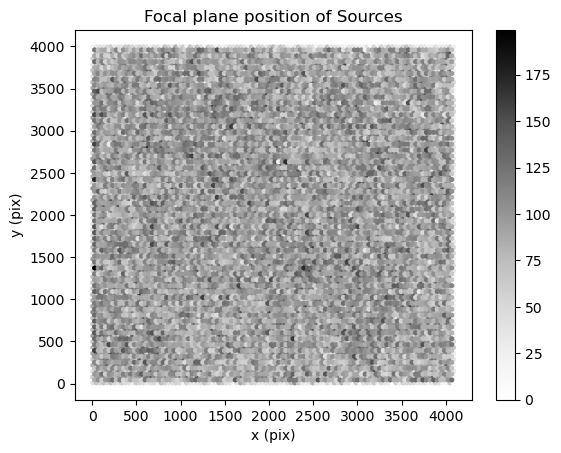

In [9]:
plt.hexbin(src_i['x'], src_i['y'], bins=200, cmap='Grays')
plt.colorbar()
plt.title('Focal plane position of Sources')
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.show()

#### Positions in World coordinates

In [10]:
src_i['ra', 'raErr', 'dec', 'decErr'][random_indices]

ra,raErr,dec,decErr
float64,float32,float64,float32
185.89529538404665,2.6536866e-06,7.197776348256755,2.7040255e-06
185.430840598385,3.760277e-05,7.300482111397822,3.6713565e-05
186.0673383955104,--,7.196032245497075,--
185.18331782358854,1.8353749e-05,7.816214654080235,1.8513974e-05
187.77648998792174,6.521947e-05,7.752084518742679,6.445649e-05


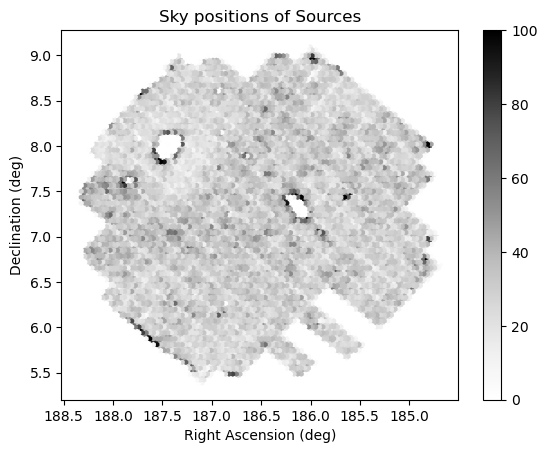

In [11]:
plt.hexbin(src_i['ra'], src_i['dec'], bins=200, cmap='Grays', vmax=100)
plt.colorbar()
plt.title('Sky positions of Sources')
plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.gca().invert_xaxis()
plt.show()

#### Flux measurements

There are many flux measurements in the Source catalogs. The following will list all column names with "Flux" in them. We see that there are aperture fluxes and PSF fluxes, along with their associated errors and quality flags.

Fluxes with "_instFlux" are uncalibrated, instrumental magnitudes. All others have been calibrated to nanoJanskys.

In [12]:
for col in src_i.colnames:
    if 'Flux' in col:
        print(col)

calibFlux
calibFluxErr
ap03Flux
ap03FluxErr
ap03Flux_flag
ap06Flux
ap06FluxErr
ap06Flux_flag
ap09Flux
ap09FluxErr
ap09Flux_flag
ap12Flux
ap12FluxErr
ap12Flux_flag
ap17Flux
ap17FluxErr
ap17Flux_flag
ap25Flux
ap25FluxErr
ap25Flux_flag
ap35Flux
ap35FluxErr
ap35Flux_flag
ap50Flux
ap50FluxErr
ap50Flux_flag
ap70Flux
ap70FluxErr
ap70Flux_flag
psfFlux
psfFluxErr
gaussianFlux
gaussianFluxErr
apFlux_12_0_flag
apFlux_12_0_flag_apertureTruncated
apFlux_12_0_flag_sincCoeffsTruncated
apFlux_12_0_instFlux
apFlux_12_0_instFluxErr
apFlux_17_0_flag
apFlux_17_0_instFlux
apFlux_17_0_instFluxErr
apFlux_35_0_flag
apFlux_35_0_instFlux
apFlux_35_0_instFluxErr
apFlux_50_0_flag
apFlux_50_0_instFlux
apFlux_50_0_instFluxErr
normCompTophatFlux_flag
normCompTophatFlux_instFlux
normCompTophatFlux_instFluxErr
localBackground_instFlux
localBackground_instFluxErr
psfFlux_apCorr
psfFlux_apCorrErr
psfFlux_area
psfFlux_flag
psfFlux_flag_apCorr
psfFlux_flag_edge
psfFlux_flag_noGoodPixels
gaussianFlux_flag
deblend_hasStrayF

In [13]:
src_i['ap09Flux', 'ap09FluxErr', 'psfFlux', 'psfFluxErr'][random_indices]

ap09Flux,ap09FluxErr,psfFlux,psfFluxErr
float64,float64,float64,float64
27598.11154680676,418.193297292355,29306.007655353762,322.6113856497352
1776.0013457579441,398.9694487833726,1771.5038120124902,290.9431317147559
1948.1928587487912,404.0291290423398,1724.3062531854346,281.9541634585778
6011.512159734237,415.3863560394721,5625.584289801737,307.51649924251615
5587.223270284263,410.6360574870059,4336.6983743402325,288.0760975806848


#### Compare the 9-pixel aperture and PSF fluxes for all sources

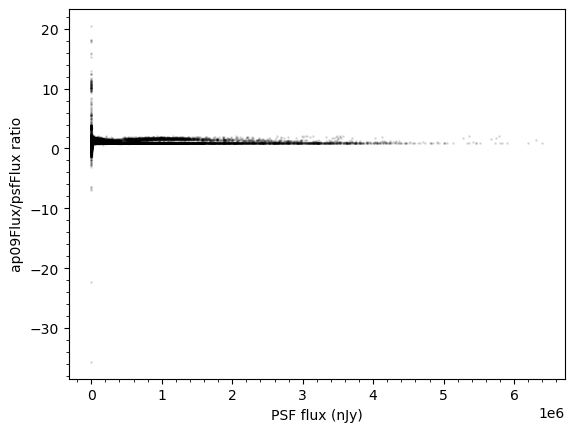

In [14]:
plt.plot(src_i['psfFlux'], src_i['ap09Flux']/src_i['psfFlux'], 'k.', ms=2, alpha=0.1)
plt.minorticks_on()
plt.xlabel('PSF flux (nJy)')
plt.ylabel('ap09Flux/psfFlux ratio')
plt.show()

We see that most sources have flux ratios of around 1.0, with some deviations (as expected for extended objects).

Confirm that the flux grows with aperture for most sources by plotting flux vs. aperture radius for a random set of sources:

/opt/lsst/software/stack/conda/envs/lsst-scipipe-10.1.0/lib/python3.12/site-packages/numpy/_core/shape_base.py:63: UserWarning: Warning: converting a masked element to nan.
  result = asanyarray(arys[0])


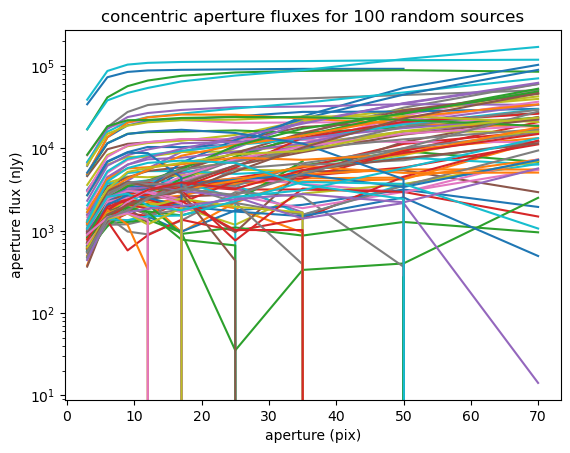

In [15]:
aps = ['03', '06', '09', '12', '17', '25', '35', '50', '70']
aps_float = [float(ap) for ap in aps]
plot_random = np.random.randint(0, len(src_i), 100)

fig = plt.figure()

for ind in plot_random:
    src = src_i[ind]
    fluxes = [src[f"ap{ap}Flux"] for ap in aps]
    plt.plot(aps_float, fluxes)

plt.xlabel('aperture (pix)')
plt.ylabel('aperture flux (nJy)')
plt.title('concentric aperture fluxes for 100 random sources')
plt.yscale('log')
plt.show()

## Results

We have demonstrated that the Source catalogs produced by the Science Pipelines contain an identifier of the Exposure (visit) and detector (ccd) on which the Source was detected, as well as measurements of source attributes (and associated errors) including location on the focal plane; a static point-source model fit to world coordinates and flux; and a centroid and adaptive moments. While the specified "surface brightnesses through multiple circular apertures that are concentric, PSF-homogenized, and logarithmically spaced in intensity" is not provided, it is unclear whether this would be scientifically useful at this time. We have, however, demonstrated that concentric aperture fluxes are provided in the Source catalogs. Thus, we deem the result of this test a **Pass**.